# 1. 绘制各类别的ROC曲线

## 1.1 ROC曲线介绍 Introduction

ROC（Receiver Operating Characteristic）曲线是一种用于评估二分类模型性能的图形工具。

- **横轴**代表假阳性率（False Positive Rate，FPR），它是负类样本被错误地分类为正类样本的比例。
$$
FPR = \frac{FP}{FP + TN}
$$
- **纵轴**代表真阳性率（True Positive Rate，TPR），也称为灵敏度（Sensitivity），它是正类样本被正确地分类为正类样本的比例。
$$
TPR = \frac{TP}{TP + FN}
$$
ROC曲线显示了在不同分类阈值下，模型的真阳性率和假阳性率之间的权衡关系。ROC曲线**越靠近左上角**，表示模型在保持较低的假阳性率的同时获得较高的真阳性率，即**模型性能越好**。理想情况下，ROC曲线通过左上角$(0, 1)$点，表示完美分类器。

除了ROC曲线外，还有一个与ROC曲线相关的度量称为AUC（Area Under the Curve），即**ROC曲线下方的面积**。AUC值越接近1，表示模型的性能越好。
$$
AUC = \int_{0}^{1} TPR(FPR^{-1}(t)) \, dt
$$
在实际运算中，假定ROC曲线是由坐标为$(x_1, y_1), (x_2, y_2),..., (x_m, y_m)$的点按序连接而形成，则AUC可估算为
$$
AUC = \sum_{i=1}^{m-1} \frac{(x_{i+1} - x_i) \cdot (y_i + y_{i+1})}{2}
$$
ROC曲线和AUC通常用于评估分类器的性能，特别是在需要权衡真阳性率和假阳性率时，它们非常有用。



## 1.2 代码 codes

第一步，引入数据库

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

第二步，进行数据的输入

In [11]:
# True labels and predicted probabilities
y_true=np.asarray([[0,0,1],[0,1,0],[1,0,0],[0,0,1],[1,0,0],[0,1,0],[0,1,0],[0,1,0],[0,0,1],[0,1,0]])
y_pred=np.asarray([[0.1,0.2,0.7],[0.1,0.6,0.3],[0.5,0.2,0.3],[0.1,0.1,0.8],[0.4,0.2,0.4],[0.6,0.3,0.1],
[0.4,0.2,0.4],[0.4,0.1,0.5],[0.1,0.1,0.8],[0.1,0.8,0.1]])
print(y_true.shape, y_pred.shape)

(10, 3) (10, 3)


第三步，计算各类别对应的roc曲线的auc值

In [12]:
n_classes = len(y_true[1,:])
# Compute ROC curve and ROC area for each class
fpr = dict()##dictionary datastructure to store the different fpr and tpr
tpr = dict()
roc_auc = dict()#record the auc for different cases
#the roc curves for each class
for i in range(n_classes):
    fpr[i],tpr[i],_= roc_curve(y_true[:,i],y_pred[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

第四步，绘图

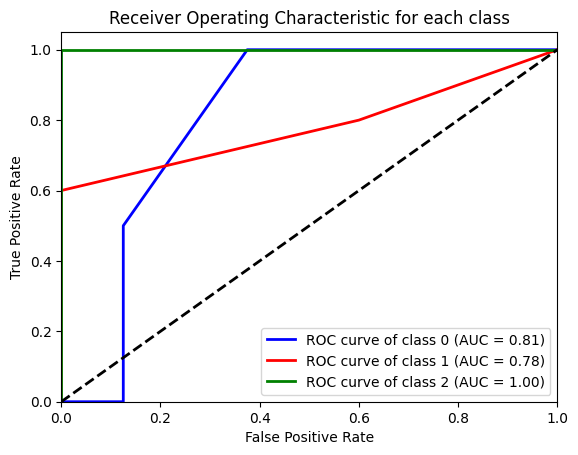

In [13]:
# Plot ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'red', 'green']  # Define colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

# 2. 绘制平均ROC曲线

Averaged ROC（平均ROC）曲线是一种汇总多个分类器或在不同数据集上训练的同一分类器所生成的ROC曲线的方法。它是通过**对每个分类器的ROC曲线进行平均**而得到的曲线。通常，Averaged ROC 曲线用于比较多个分类器的性能，或者用于评估单个分类器在不同数据集上的稳定性。

生成 Averaged ROC 曲线的步骤通常包括：

- 在每个数据集或交叉验证折叠中，训练分类器并获得对应的 ROC 曲线。
- 对于每个分类器，收集其在所有数据集或交叉验证折叠上的 ROC 曲线。
- 对所有 ROC 曲线进行逐点平均，得到 Averaged ROC 曲线。

Averaged ROC 曲线的主要优点是它可以提供对模型性能的整体评估，并且在评估分类器性能时可以减少数据集方差的影响。这使得 Averaged ROC 曲线成为评估分类器性能的有用工具，尤其是在需要比较多个分类器或者评估分类器在不同数据集上的一致性时。

## 2.1 微观评估指标 microscopic evaluation metrics

### 2.1.1 Introduction
微观级别评估指标（microscopic evaluation metrics）通常是在多类别分类问题中使用的性能度量，它将所有类别的真阳性率（True Positive Rate，TPR）和假阳性率（False Positive Rate，FPR）汇总成一个单一的值。在这种情况下，TPR 和 FPR 的计算方法如下：

假设有多个类别，每个类别分别有真阳性（True Positives，TP_i）、假阳性（False Positives，FP_i）、真阴性（True Negatives，TN_i）和假阴性（False Negatives，FN_i）。

- TPR（真阳性率，也称为灵敏度）的计算公式为：

$$TPR = \frac{\sum_{i=1}^{k} TP_i}{\sum_{i=1}^{k} (TP_i + FN_i)}$$

其中，$k$是类别的数量。

- FPR（假阳性率）的计算公式为：

$$FPR = \frac{\sum_{i=1}^{k} FP_i}{\sum_{i=1}^{k} (FP_i + TN_i)}$$

其中，$k$是类别的数量。

### 2.1.2 代码 codes

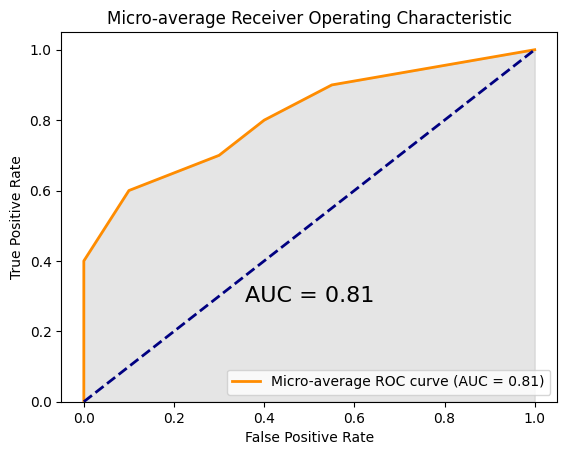

In [33]:
# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_true.ravel(), y_pred.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot micro-average ROC curve
plt.figure()
lw = 2
plt.plot(fpr_micro, tpr_micro, color='darkorange',
         lw=lw, label='Micro-average ROC curve (AUC = %0.2f)' % roc_auc_micro)
plt.fill_between(fpr_micro, tpr_micro, color='gray', alpha=0.2)  # Fill area under the curve with gray color and 20% transparency

# Add AUC value in the shaded area
plt.text(0.5, 0.3, 'AUC = %0.2f' % roc_auc_micro, ha='center', va='center', fontsize=16)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Macroscopic evaluation metrics（宏观评估指标）通常是在多个类别或多个数据集上进行评估的，因此需要对每个类别或数据集的真阳性率（True Positive Rate，TPR）和假阳性率（False Positive Rate，FPR）进行汇总。这里我将分别介绍宏观评估指标的TPR和FPR计算方法，并提供相应的公式。

- **宏观平均的真阳性率（Macroscopic TPR）**：

宏观平均的真阳性率是所有类别的真阳性率的平均值。它可以通过将每个类别的真阳性率相加并除以类别数来计算。

$$
\text{TPR} = \frac{\sum_{i=1}^{n} TPR_i}{n}
$$

其中，\( TPR_i \) 表示第 \( i \) 个类别的真阳性率，\( n \) 表示类别数。

- **宏观平均的假阳性率（Macroscopic FPR）**：

宏观平均的假阳性率是所有类别的假阳性率的平均值。它可以通过将每个类别的假阳性率相加并除以类别数来计算。

$$
\text{FPR} = \frac{\sum_{i=1}^{n} FPR_i}{n}
$$

其中，\( FPR_i \) 表示第 \( i \) 个类别的假阳性率，\( n \) 表示类别数。

这些公式允许对多个类别或数据集的评估指标进行汇总，以便对整体模型性能进行评估。

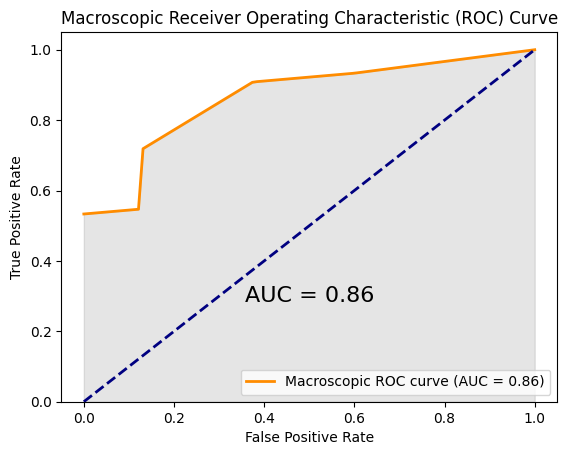

In [40]:
# Compute macro-average ROC curve and RoC area
fpr_grid = np.linspace(0.0,1.0,100)##given all the possbiel fprs,ranging from 0 to 1,defining x axis.

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)##have the same dimension with fprs.
for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])#get the corresponding tprs with linear interpolations

# Average it and compute AUC
mean_tpr /= n_classes

# Plot macroscopic ROC curve
plt.figure()
plt.plot(fpr_grid, mean_tpr, color='darkorange',
         lw=2, label='Macroscopic ROC curve (AUC = {:.2f})'.format(
             auc(fpr_grid, mean_tpr)))
plt.fill_between(fpr_grid, mean_tpr, color='gray', alpha=0.2)  # Fill area under the curve with gray color and 20% transparency

# Add AUC value in the shaded area
plt.text(0.5, 0.3, 'AUC = %0.2f' % auc(fpr_grid, mean_tpr), ha='center', va='center', fontsize=16)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macroscopic Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

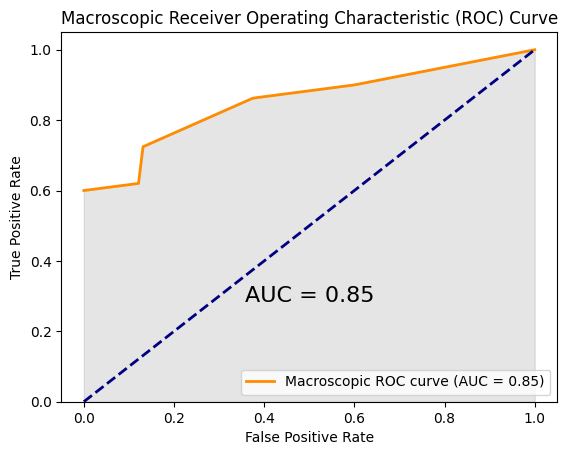

In [43]:
# class ratios
y_true_list = list([tuple(t)for t in y_true])
classNum = dict((a,y_true_list.count(a)) for a in y_true_list)
n1 = classNum[(1,0,0)]
n2 = classNum [(0,1,0)]
n3 = classNum[(0,0,1)]
ratio = [n1/(n1+n2+n3),n2/(n1+n2+n3),n3/(n1+n2+n3)]
avg_tpr = np.zeros_like(fpr_grid)##have the same dimension with fprs.
for i in range(n_classes):
    avg_tpr += ratio[i]*np.interp(fpr_grid,fpr[i],tpr[i]) # get the corresponding tprs with linear interpolations

# Plot macroscopic ROC curve
plt.figure()
plt.plot(fpr_grid, avg_tpr, color='darkorange',
         lw=2, label='Macroscopic ROC curve (AUC = {:.2f})'.format(
             auc(fpr_grid, avg_tpr)))
plt.fill_between(fpr_grid, avg_tpr, color='gray', alpha=0.2)  # Fill area under the curve with gray color and 20% transparency

# Add AUC value in the shaded area
plt.text(0.5, 0.3, 'AUC = %0.2f' % auc(fpr_grid, avg_tpr), ha='center', va='center', fontsize=16)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macroscopic Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()